#  Análisis del nacimiento de los bebés en Estados Unidos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
births = pd.read_csv("../../data/us-births.csv")

In [3]:
births.shape

(15547, 5)

In [8]:
births.head(10)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
5,1969,1,3.0,M,4994
6,1969,1,4.0,F,4440
7,1969,1,4.0,M,4520
8,1969,1,5.0,F,4192
9,1969,1,5.0,M,4198


In [15]:
(births.groupby(['year','gender'])['births'].sum())

year  gender
1969  F         1753634
      M         1846572
1970  F         1819164
      M         1918636
1971  F         1736774
                 ...   
2006  M         2188268
2007  F         2111890
      M         2212118
2008  F         2077929
      M         2177227
Name: births, Length: 80, dtype: int64

In [13]:
births.tail(5)

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [16]:
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum') # tabla resumen anual

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [23]:
# Una argucia para agrupar los datos de la columna 'year'
births['decade'] = (births['year']//10)*10
births.head(5)

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [24]:
# transformamos la variable 'decade en string'

births.decade = births.decade.astype(str)+'s'
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960s
1,1969,1,1.0,M,4440,1960s
2,1969,1,2.0,F,4454,1960s
3,1969,1,2.0,M,4548,1960s
4,1969,1,3.0,F,4548,1960s
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000s
15543,2008,11,NaN,F,158939,2000s
15544,2008,11,NaN,M,165468,2000s
15545,2008,12,NaN,F,173215,2000s


In [25]:
# vamos a hacer la tabla pivote

births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum' )

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


In [26]:
%matplotlib inline

In [28]:
import seaborn as sb

In [30]:
sb.set() # configura las tonalidades de colores en los gráficos

<Figure size 1080x576 with 0 Axes>

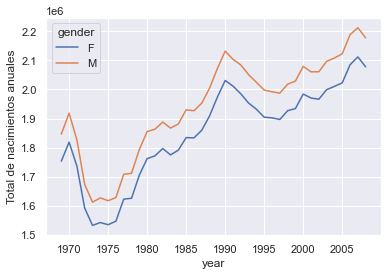

In [34]:
# vamos a graficar los datos de la base births de USA hasta 2008, la misma función pivota table está 
# preparada para esto
plt.figure(figsize = (15,8))
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('Total de nacimientos anuales')
plt.show()

In [40]:
# Viendo el comportamiento de los naciemientos entre el 68-08 
quartiles = np.percentile(births['births'],[25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [41]:
med = quartiles[1] # este es la mediana
IQR = quartiles[2] - quartiles[0] # rango intercuartílico
sig = 0.75*IQR  # una desviación de los datos

In [55]:
births = births.query("(births > @med - 5*@sig) & (births < @med + 5*@sig)") # construimos un df sacando valores atípicos
births.shape


(14610, 6)

In [59]:
# vamos a transformar la variable numérica 'month 'a entero

births['day'] = births['day'].dropna().astype(int)
births

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960s
1,1969,1,1,M,4440,1960s
2,1969,1,2,F,4454,1960s
3,1969,1,2,M,4548,1960s
4,1969,1,3,F,4548,1960s
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980s
15063,1988,12,30,F,5742,1980s
15064,1988,12,30,M,6095,1980s
15065,1988,12,31,F,4435,1980s


In [61]:
# transformando el índice del dataset a un formato de fecha con pandas
births.index = pd.to_datetime(10000*births.year+100 * births.month+births.day, format = "%Y%m%d")
births.head(5)


,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960s
1969-01-01,1969,1,1,M,4440,1960s
1969-01-02,1969,1,2,F,4454,1960s
1969-01-02,1969,1,2,M,4548,1960s
1969-01-03,1969,1,3,F,4548,1960s


In [62]:
# quiero saber el día de la semana, el cero correspondera a lunes

births['dayofweek'] = births.index.dayofweek
births.head(5)

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960s,2
1969-01-01,1969,1,1,M,4440,1960s,2
1969-01-02,1969,1,2,F,4454,1960s,3
1969-01-02,1969,1,2,M,4548,1960s,3
1969-01-03,1969,1,3,F,4548,1960s,4


<ipython-input-71-b43f4972418c>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["","Lun","Mar", "Mie","Jue","Vie","Sáb", "Dom"])


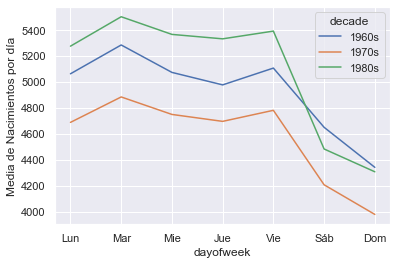

In [71]:
births.pivot_table('births', index = 'dayofweek', columns = 'decade', aggfunc="mean").plot()
plt.gca().set_xticklabels(["","Lun","Mar", "Mie","Jue","Vie","Sáb", "Dom"])
plt.ylabel("Media de Nacimientos por día")
plt.show()

# al parecer es menos común tener hijos

In [97]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day], aggfunc = "mean")
births_by_date


births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [104]:
births_by_date.index = [pd.datetime(2020,month,day) for (month,day) in births_by_date.index] 


TypeError: cannot unpack non-iterable Timestamp object

In [103]:
births_by_date

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625
...,...
2020-12-27,4850.150
2020-12-28,5044.200
2020-12-29,5120.150
2020-12-30,5172.350


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x288 with 0 Axes>

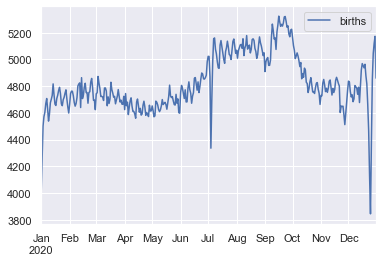

In [107]:
plt.figure(figsize=(12,4))
births_by_date.plot()
plt.show